In [1]:
import numpy as np
import pandas as pd

# Load cleaned EEG CSV
eeg_data = pd.read_csv("/Users/saravanakumar.durais/Work/Speech_BCI/NEARBY/Session2.csv", header=None).to_numpy()
print(f"Loaded cleaned EEG shape: {eeg_data.shape}")  # (63, 128000)

# Load labels from original .npz file
npz_file = np.load("/Users/saravanakumar.durais/Downloads/s01_Session2_run003.npz", allow_pickle=True)
labels = npz_file['labels']
num_trials = len(labels)
print(f"Total trials: {num_trials}")

total_samples = eeg_data.shape[1]
# Calculate trial length from total samples and number of trials
trial_length = total_samples // num_trials
print(f"Calculated downsampled trial length: {trial_length}")

# Optional: check if total samples divides evenly
if total_samples % num_trials != 0:
    print("Warning: total samples is not perfectly divisible by number of trials; trimming last samples.")
    eeg_data = eeg_data[:, :trial_length * num_trials]

# Split EEG data into trials and assign labels
trials = []
trial_labels = []

for i in range(num_trials):
    start = i * trial_length
    end = start + trial_length
    trial_data = eeg_data[:, start:end]  # shape: (63, trial_length)
    trials.append(trial_data)
    trial_labels.append(labels[i])

trials = np.array(trials)         # shape: (200, 63, trial_length)
trial_labels = np.array(trial_labels)

print(f"Trials shape: {trials.shape}")
print(f"Labels shape: {trial_labels.shape}")

# Print first 5 labels as a sanity check
for i in range(5):
    print(f"Trial {i+1} label: {trial_labels[i]}")

    
# Flatten to get global stats (temporary, no shape change to trials)
all_data = trials.flatten()

# Global mean/std across all trials, channels, samples
global_mean = np.mean(all_data)
global_std = np.std(all_data)

# Normalize original trials array with these stats
trials_norm = (trials - global_mean) / global_std

# trials_norm shape == trials shape, spatial & temporal info intact
print(trials_norm.shape)  # e.g., (200, 63, 640)


unique_labels = np.sort(np.unique(labels))  # ensures order: 0,1,2,3,4
ensemble_averages = np.zeros((len(unique_labels), trials_norm.shape[1], trials_norm.shape[2]))

for i, lbl in enumerate(unique_labels):
    class_trials = trials_norm[labels == lbl]
    ensemble_averages[i] = np.mean(class_trials, axis=0)  # (channels, samples)

print(f"Ensemble averages shape: {ensemble_averages.shape}")  # (5, 63, 640)

/Users/saravanakumar.durais/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Loaded cleaned EEG shape: (63, 128000)
Total trials: 200
Calculated downsampled trial length: 640
Trials shape: (200, 63, 640)
Labels shape: (200,)
Trial 1 label: 1
Trial 2 label: 3
Trial 3 label: 4
Trial 4 label: 0
Trial 5 label: 3
(200, 63, 640)
Ensemble averages shape: (5, 63, 640)


In [2]:


# Load cleaned EEG CSV
eeg_data = pd.read_csv("/Users/saravanakumar.durais/Work/Speech_BCI/NEARBY/Session2new.csv", header=None).to_numpy()
print(f"Loaded cleaned EEG shape: {eeg_data.shape}")  # (63, 128000)

# Load labels from original .npz file
npz_file = np.load("/Users/saravanakumar.durais/Downloads/s01_Session3_run003.npz", allow_pickle=True)
labels = npz_file['labels']
num_trials = len(labels)
print(f"Total trials: {num_trials}")

total_samples = eeg_data.shape[1]
# Calculate trial length from total samples and number of trials
trial_length = total_samples // num_trials
print(f"Calculated downsampled trial length: {trial_length}")

# Optional: check if total samples divides evenly
if total_samples % num_trials != 0:
    print("Warning: total samples is not perfectly divisible by number of trials; trimming last samples.")
    eeg_data = eeg_data[:, :trial_length * num_trials]

# Split EEG data into trials and assign labels
trials = []
trial_labels = []

for i in range(num_trials):
    start = i * trial_length
    end = start + trial_length
    trial_data = eeg_data[:, start:end]  # shape: (63, trial_length)
    trials.append(trial_data)
    trial_labels.append(labels[i])

trials = np.array(trials)         # shape: (200, 63, trial_length)
trial_labels = np.array(trial_labels)

print(f"Trials shape: {trials.shape}")
print(f"Labels shape: {trial_labels.shape}")

# Print first 5 labels as a sanity check
for i in range(5):
    print(f"Trial {i+1} label: {trial_labels[i]}")

    
# Flatten to get global stats (temporary, no shape change to trials)
all_data = trials.flatten()

# Global mean/std across all trials, channels, samples
global_mean = np.mean(all_data)
global_std = np.std(all_data)

# Normalize original trials array with these stats
trials_norm = (trials - global_mean) / global_std

# trials_norm shape == trials shape, spatial & temporal info intact
print(trials_norm.shape)  # e.g., (200, 63, 640)

unique_labels = np.sort(np.unique(labels))  # ensures order: 0,1,2,3,4
ensemble_averages_one = np.zeros((len(unique_labels), trials_norm.shape[1], trials_norm.shape[2]))

for i, lbl in enumerate(unique_labels):
    class_trials = trials_norm[labels == lbl]
    ensemble_averages_one[i] = np.mean(class_trials, axis=0)  # (channels, samples)

print(f"Ensemble averages shape: {ensemble_averages_one.shape}")  # (5, 63, 640)


Loaded cleaned EEG shape: (63, 128000)
Total trials: 200
Calculated downsampled trial length: 640
Trials shape: (200, 63, 640)
Labels shape: (200,)
Trial 1 label: 3
Trial 2 label: 1
Trial 3 label: 0
Trial 4 label: 1
Trial 5 label: 3
(200, 63, 640)
Ensemble averages shape: (5, 63, 640)


KL divergence: Variable 1 Class 1 vs Variable 2 Class 1
Mean KL divergence over channels: 0.4472
--------------------------------------------------


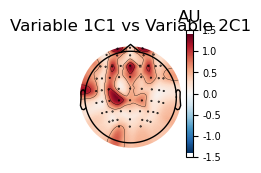

KL divergence: Variable 1 Class 2 vs Variable 2 Class 2
Mean KL divergence over channels: 0.4093
--------------------------------------------------


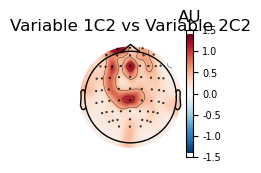

KL divergence: Variable 1 Class 3 vs Variable 2 Class 3
Mean KL divergence over channels: 0.5415
--------------------------------------------------


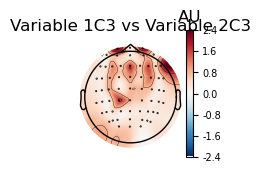

KL divergence: Variable 1 Class 4 vs Variable 2 Class 4
Mean KL divergence over channels: 0.7878
--------------------------------------------------


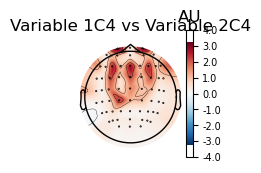

KL divergence: Variable 1 Class 5 vs Variable 2 Class 5
Mean KL divergence over channels: 0.6698
--------------------------------------------------


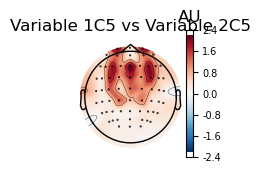

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import mne
from mne.evoked import EvokedArray

def compute_kl_divergence(p, q, bins=50, epsilon=1e-10):
    """
    Compute KL divergence between two 1D signals p and q using histogram approximation.
    """
    p_hist, bin_edges = np.histogram(p, bins=bins, density=True)
    q_hist, _ = np.histogram(q, bins=bin_edges, density=True)
    p_hist += epsilon
    q_hist += epsilon
    p_hist /= p_hist.sum()
    q_hist /= q_hist.sum()
    return entropy(p_hist, q_hist)

def kl_across_same_classes(v1_data, v2_data, var1_name='Variable 1', var2_name='Variable 2'):
    """
    Compute KL divergence between matching classes of two variables and plot topomaps.
    
    v1_data and v2_data: list or dict with 5 elements (classes), each ndarray (channels x samples)
    """
    n_classes = len(v1_data)
    n_channels = v1_data[0].shape[0]

    # EEG channel names (63 channels)
    ch_names = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'AFz', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CPz', 'CP5', 'CP1', 'CP2', 'CP6', 'P7',
                'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'O2', 'AF7', 'AF3', 'AF4', 'AF8', 'F5',
                'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CP4',
                'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8',
                'PO7', 'PO8', 'Oz']
    assert len(ch_names) == n_channels, "Channel count mismatch!"

    info = mne.create_info(ch_names=ch_names, sfreq=256, ch_types='eeg')
    info.set_montage('standard_1020')

    for i in range(n_classes):
        kl_values = np.zeros(n_channels)
        for ch in range(n_channels):
            p_feat = v1_data[i][ch]
            q_feat = v2_data[i][ch]
            kl_values[ch] = compute_kl_divergence(p_feat, q_feat)
        
        mean_kl = kl_values.mean()
        print(f"KL divergence: {var1_name} Class {i+1} vs {var2_name} Class {i+1}")
        print(f"Mean KL divergence over channels: {mean_kl:.4f}")
        print("--------------------------------------------------")

        # Create EvokedArray and plot topomap
        kl_evoked = EvokedArray(kl_values[:, np.newaxis], info, tmin=0.0)
        fig = kl_evoked.plot_topomap(times=0, scalings=1, cmap='RdBu_r', time_format='', show=False)
        ax = fig.axes[0]
        ax.set_title(f"{var1_name}C{i+1} vs {var2_name}C{i+1}")
        plt.show()

# Usage example (replace with your actual data):
# ensemble_averages and ensemble_averages_one are lists or dicts with 5 classes, each (63 x samples)
kl_across_same_classes(ensemble_averages, ensemble_averages_one)
